<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/HW3/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **`Data collection`**

In [188]:
url = 'https://drive.google.com/uc?id=1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo'

# Read the CSV file
try:
    data = pd.read_csv(url)
except Exception as e:
    print(f"Error reading CSV: {e}")

---
# **Data analysis.**    Аналіз даних.
---

In [189]:
data.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
489,2835000,3300,3,1,2,no,no,no,no,no,1,no,semi-furnished
148,5600000,6360,3,1,3,yes,no,no,no,no,0,yes,semi-furnished
263,4410000,3968,3,1,2,no,no,no,no,no,0,no,semi-furnished
311,4123000,6060,2,1,1,yes,no,yes,no,no,1,no,semi-furnished
338,3885000,3780,2,1,2,yes,yes,yes,no,no,0,no,semi-furnished


In [190]:
data[data.isna()].count()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


---
# 1. Write the linear regression hypothesis function in vector form;
напишіть функцію гіпотези лінійної регресії у векторному вигляді;
---

$$h(x) = w_0 + w_1*x$$
$$h(x_1,x_2) = w_0 + w_1*x_1 + w_2*x_2 $$
$$h(x_1,...,x_n) = w_0 + w_1*x_1 + ... + w_n*x_n $$
$$ h(x_i) = w0 + \sum_{i=1}^n w_n*x_n $$

$$ \vec{x} = \begin{pmatrix} 1 \\ x_1 \\ ..  \\ x_n   \end{pmatrix},
\vec{w} = \begin{pmatrix} w_0 \\ w_1 \\ ..\\ w_n \end{pmatrix}$$

$$ h(\vec{x})= \vec{x} \cdot \vec{w}  $$
<!-- $$h(\overrightarrow{x}) = \overrightarrow{w} \cdot  \overrightarrow{x}$$ -->

or
$$
h(\mathbf{X}) = \mathbf{w}^T \mathbf{X}
$$


In [192]:
def hypothesis(X, w):
  return np.dot(X, w)

---
# 2. Create a function to calculate the loss function in vector form;
створіть функцію для обчислення функції втрат у векторному вигляді;
---

$$
Loss = \frac{1}{2n} \| Xw - y \|^2
$$
or
$$
J(w_0​,w_1, ... ,w_n)=\frac{1}{2m} \sum_{i=1}^{m}​(h(x^{(i)})−y^{(i)})^2  
$$



In [193]:
def loss_func(X, y, w):
  m = len(y)
  h = hypothesis(X, w)
  error = h - y
  loss = (1 / (2 * m)) * np.sum((error) ** 2)
  return loss

---
# 3. Implement one step of gradient descent;
реалізуйте один крок градієнтного спуску;
---

градієнт функції втрат -
$$  
\nabla J(\vec{w}) =
\begin{pmatrix}
\frac{\partial J(\vec{w})}{\partial w_0} \\
\frac{\partial J(\vec{w})}{\partial w_1} \\
\frac{\partial J(\vec{w})}{\partial w_2} \\
.. \\
\frac{\partial J(\vec{w})}{\partial w_n} \\
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})\\
\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})x_1^{(i)} \\
\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})x_2^{(i)} \\
.. \\
\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})x_n^{(i)} \\
\end{pmatrix}
$$

$$
\vec{w}
=\vec{w}^{prev} − α \nabla J(\vec{w})
$$

m — кількість зразків (samples).

n — кількість ознак (features) у кожному зразку.

$$
X_{m,n}=
\begin{bmatrix}
 1&  x^{(1)}_{1}&  x^{(1)}_{2}&  …&  x^{(1)}_{n}  \\
 1&  x^{(2)}_{1}&  x^{(2)}_{2}&  …&  x^{(2)}_{n}  \\
 1&  x^{(3)}_{1}&  x^{(3)}_{2}&  …&  x^{(3)}_{n}  \\
 \vdots&   \vdots&   \vdots&   \ddots&  \vdots&   \\
 1&  x^{(m)}_{1}&  x^{(m)}_{2}&  …&  x^{(m)}_{n}  \\
\end{bmatrix}​​
$$

$$
∇J(\vec{w})=\frac{1}{m}​  X^T(X \vec{w} - \vec{y}​)
$$

In [194]:
def gradient_descent_step(X, y, w, learning_rate=0.001):
  m = len(y)
  h = hypothesis(X, w)
  error = h - y
  gradient = (1 / m) * np.dot(X.T, error)
  w -= learning_rate * gradient
  return w

In [195]:
def gradient_descent(X, y, w, num_iterations=1, learning_rate=0.001):
  loss_history = np.zeros(num_iterations)
  for i in range(num_iterations):
      w = gradient_descent_step(X, y, w, learning_rate)
      loss_history[i] = loss_func(X, y, w)
  return w, loss_history


# **Data preparing**

In [196]:
x_columns = ["area", "bedrooms","bathrooms"]
y_column = "price"
# data_columns = [y_column] + x_columns
# data_columns = [y_column, *x_columns]

# Формування матриці ознак X і вектору цільових змінних y
X = data[x_columns].values
y = data[y_column].values

# Масштабування даних
scaler = StandardScaler()
X = scaler.fit_transform(data[x_columns])
y = scaler.fit_transform(data[[y_column]]).flatten()



### Adding an Intercept

To include the intercept \( w_0 \) in our model, we need to add a column of ones to the matrix \( X \). This ensures that the linear regression equation:

$$
y = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
$$

is represented as:

$$
y = Xw
$$

where:

- \( X \) is the feature matrix augmented with a column of ones:
  $$
  X = \begin{bmatrix}
  1 & x_{11} & x_{12} & \dots & x_{1n} \\
  1 & x_{21} & x_{22} & \dots & x_{2n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  1 & x_{m1} & x_{m2} & \dots & x_{mn}
  \end{bmatrix}
  $$
- \( w \) is the coefficient vector, including the intercept \( w_0 \).

In [197]:

# Додавання одиничного стовпця для градієнтного спуску
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

# Ініціалізація параметрів w
num_features = X_with_bias.shape[1]
w = np.zeros(num_features)

**One step of gradient descent**

один крок градієнтного спуску

In [198]:
# Налаштування параметрів градієнтного спуску
learning_rate = 0.0001
num_iterations = 1

# Запуск градієнтного спуску
final_weight, loss_history = gradient_descent(X_with_bias, y, w, num_iterations, learning_rate)

print("One step w (один крок градієнтного спуску): ", final_weight)
print('One step loss: ', loss_history)

One step w (один крок градієнтного спуску):  [1.68264994e-20 5.35997346e-05 3.66494026e-05 5.17545339e-05]
One step loss:  [0.49993106]


---
# 4. Find the best parameters w for the dataset predicting the price of a house depending on the area, number of bathrooms, and number of bedrooms;

знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;
  ---

In [207]:
# Налаштування параметрів градієнтного спуску
learning_rate = 0.001
num_iterations = 1000

# Запуск градієнтного спуску
final_weights, loss_history = gradient_descent(X_with_bias, y, w, num_iterations, learning_rate)

print("Оптимальні параметри w (градієнтний спуск):", final_weights)


Оптимальні параметри w (градієнтний спуск): [1.73824869e-16 3.18539107e-01 1.71657476e-01 2.84713962e-01]


---
# 5. Find these same parameters using an analytical solution
знайдіть ці ж параметри за допомогою аналітичного рішення.
---

In [208]:

# Навчання моделі LinearRegression
model = LinearRegression()
model.fit(X, y)

# Отримання коефіцієнтів з LinearRegression
print(f"Коефіцієнти (LinearRegression): {model.coef_}")
print(f"Зміщення (intercept_) (LinearRegression): {model.intercept_}")


Коефіцієнти (LinearRegression): [0.43945209 0.16052866 0.37234442]
Зміщення (intercept_) (LinearRegression): 3.163612015992004e-16


---
# 6. Compare the results obtained.
порівняйте отримані результати.
---

In [209]:

# Порівняння коефіцієнтів:
comparison_coef = pd.DataFrame({
    "Feature": ["Intercept", "area", "bedrooms", "bathrooms"],
    "Gradient Descent": [final_weights[0], final_weights[1], final_weights[2], final_weights[3]],
    "Linear Regression": [model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2]]
})

print(comparison_coef)

     Feature  Gradient Descent  Linear Regression
0  Intercept      1.738249e-16       3.163612e-16
1       area      3.185391e-01       4.394521e-01
2   bedrooms      1.716575e-01       1.605287e-01
3  bathrooms      2.847140e-01       3.723444e-01


---
# **Prediction**
Прогнозування ціни будинка
---

In [215]:

# Прогнозування на основі моделі LinearRegression
y_pred_lr = model.predict(X)

# Прогнозування за допомогою градієнтного спуску
y_pred_gd = hypothesis(X_with_bias, final_weights)

# Зворотне масштабування прогнозованих значень
y_pred_lr_rescaled = scaler.inverse_transform(y_pred_lr.reshape(-1, 1)).flatten()
y_pred_gd_rescaled = scaler.inverse_transform(y_pred_gd.reshape(-1, 1)).flatten()

# Створення таблиці з фактичними та прогнозованими значеннями для обох моделей
predicted_data = data.copy()
# predicted_data['Predicted Price (LR)'] = y_pred_lr_rescaled.round()
# predicted_data['Predicted Price (GD)'] = y_pred_gd_rescaled.round()
predicted_data['Predicted Price (LR)'] = y_pred_lr_rescaled
predicted_data['Predicted Price (GD)'] = y_pred_gd_rescaled
predicted_data['Predicted Price (LR)'] = predicted_data['Predicted Price (LR)'].apply(lambda x: round(x))
predicted_data['Predicted Price (GD)'] = predicted_data['Predicted Price (GD)'].apply(lambda x: round(x))

# Виведення таблиці з фактичними та прогнозованими значеннями
predicted_data[['area', 'bedrooms', 'bathrooms', 'price', 'Predicted Price (GD)', 'Predicted Price (LR)']].head()



,area,bedrooms,bathrooms,price,Predicted Price (GD),Predicted Price (LR)
0,7420,4,2,13300000,6596471,7036627
1,8960,4,4,12250000,9138967,10392021
2,9960,3,2,12250000,6858800,7591865
3,7500,4,2,12215000,6618435,7066928
4,7420,4,1,11410000,5536625,5650578


---
# Forecast accuracy
Точність прогнозу
---

1. R^2 (Коефіцієнт детермінації):

In [203]:
# Обчислення R^2 для Linear Regression
r2_lr = r2_score(y, y_pred_lr_rescaled)

# Обчислення R^2 для Gradient Descent
r2_gd = r2_score(y, y_pred_gd_rescaled)

print(f"R^2 для Linear Regression: {r2_lr}")
print(f"R^2 для Gradient Descent: {r2_gd}")

R^2 для Linear Regression: -24422660858894.727
R^2 для Gradient Descent: -22751933946270.055


Отже, негативне значення R² є індикатором того, що наша модель не є адекватною для даного набору даних і потребує додаткового аналізу або вдосконалення.

2. МSE (Середньоквадратична помилка) та RMSE (Корінь середньоквадратичної помилки)

In [204]:

# Обчислення MSE для Linear Regression
mse_lr = mean_squared_error(y, y_pred_lr_rescaled)
rmse_lr = np.sqrt(mse_lr)

# Обчислення MSE для Gradient Descent
mse_gd = mean_squared_error(y, y_pred_gd_rescaled)
rmse_gd = np.sqrt(mse_gd)

print(f"MSE для Linear Regression: {mse_lr}")
print(f"RMSE для Linear Regression: {rmse_lr}")
print(f"MSE для Gradient Descent: {mse_gd}")
print(f"RMSE для Gradient Descent: {rmse_gd}")

MSE для Linear Regression: 24422660858895.72
RMSE для Linear Regression: 4941928.860161356
MSE для Gradient Descent: 22751933946271.047
RMSE для Gradient Descent: 4769898.735431503


3. MAE (Середня абсолютна помилка)

In [205]:
# Обчислення MAE для Linear Regression
mae_lr = mean_absolute_error(y, y_pred_lr_rescaled)

# Обчислення MAE для Gradient Descent
mae_gd = mean_absolute_error(y, y_pred_gd_rescaled)

print(f"MAE для Linear Regression: {mae_lr}")
print(f"MAE для Gradient Descent: {mae_gd}")

MAE для Linear Regression: 4766729.247706422
MAE для Gradient Descent: 4766729.247706422


In [213]:
min_price = data['price'].min()
max_price = data['price'].max()

print(f"Мінімальна ціна: {min_price}")
print(f"Максимальна ціна: {max_price}")

Мінімальна ціна: 1750000
Максимальна ціна: 13300000


---
# **Visualisation**
---

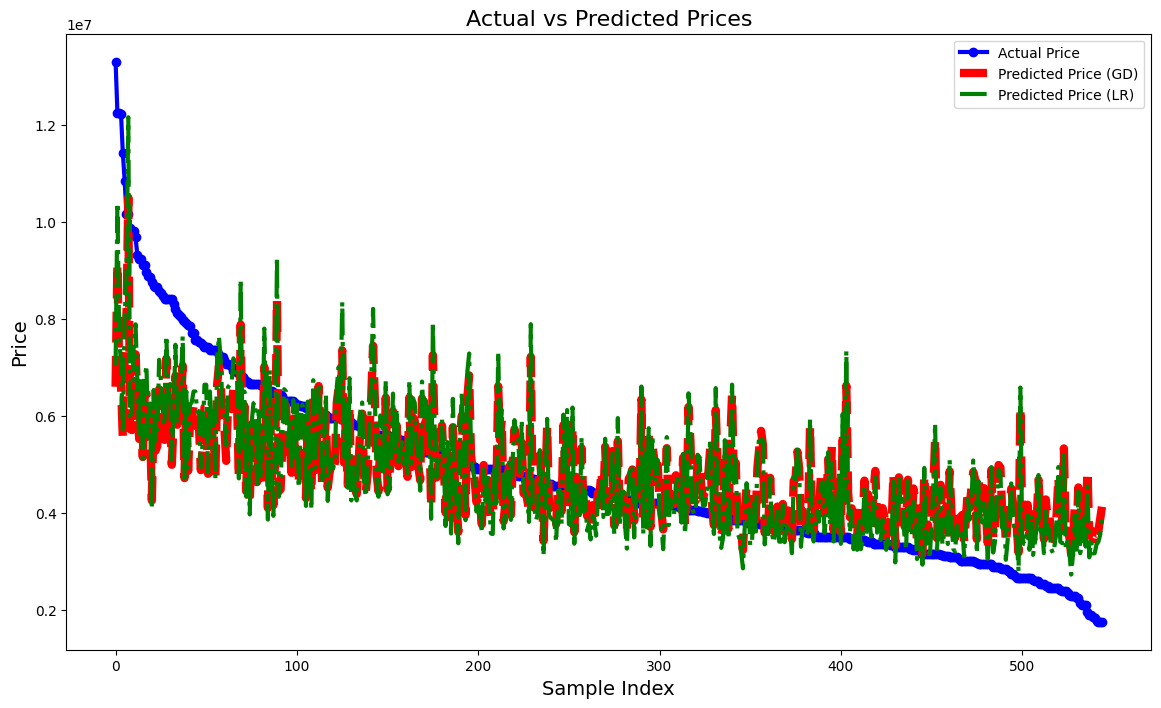

In [216]:

# Створення графіку з більшим розміром
plt.figure(figsize=(14, 8))  # Розміри: ширина 14 дюймів, висота 8 дюймів

# Графік для фактичних значень з більшою товщиною лінії
plt.plot(data.index, data['price'], label='Actual Price', color='blue', linestyle='-', marker='o', linewidth=3)

# Графік для прогнозованих значень за допомогою градієнтного спуску з більшою товщиною лінії
plt.plot(predicted_data.index, predicted_data['Predicted Price (GD)'], label='Predicted Price (GD)', color='red', linestyle='--', linewidth=6)

# Графік для прогнозованих значень за допомогою LinearRegression з більшою товщиною лінії
plt.plot(predicted_data.index, predicted_data['Predicted Price (LR)'], label='Predicted Price (LR)', color='green', linestyle='-.', linewidth=3)

# Налаштування графіка
plt.title('Actual vs Predicted Prices', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()

# Відображення графіку
plt.show()

